## Набор данных про фейковые новости

### Импортируем библиотеки

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

### Загрузка датасета

In [26]:
fake_news = pd.read_csv("Fake.csv")
print(fake_news.shape)
print(fake_news.head())

(23481, 4)
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


In [27]:
true_news = pd.read_csv("True.csv")
print(true_news.shape)
print(true_news.head())

(21417, 4)
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [28]:
fake_news["fake"] = 1
print(fake_news.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  fake  
0  December 31, 2017     1  
1  December 31, 2017     1  
2  December 30, 2017     1  
3  December 29, 2017     1  
4  December 25, 2017     1  


In [29]:
true_news["fake"] = 0
print(true_news.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  fake  
0  December 31, 2017      0  
1  December 29, 2017      0  
2  December 31, 2017      0  
3  December 30, 2017      0  
4  December 29, 2017      0  


### Создание общего датасета

In [30]:
news = pd.concat([fake_news, true_news])
news.sample(10)

,title,text,subject,date,fake
5061,Mike Pence Once Said The Most INSANELY LAUGHA...,While it s often useless to talk about things ...,News,"August 13, 2016",1
21348,Slain Philippine teenager's family files murde...,MANILA (Reuters) - The parents and lawyers of ...,worldnews,"August 25, 2017",0
9855,U.S. lawmaker wants hearing on bill to curb sh...,(Reuters) - A U.S. lawmaker has called for a c...,politicsNews,"April 20, 2016",0
20428,BREAKING: FL MUSLIM TERRORIST Worked For Secur...,"As a side note, the illegal aliens who are bei...",left-news,"Jun 13, 2016",1
3245,Montana congressman-elect sentenced to communi...,"BOZEMAN, Mont. (Reuters) - A Montana Republica...",politicsNews,"June 12, 2017",0
22099,Hollywood Suffers Meltdown Over Trump’s Withdr...,Hollywood is having kittens over US President ...,US_News,"June 2, 2017",1
17663,A rare look inside the 'heart of society' for ...,"NAJAF, Iraq (Reuters) - For more than 1,000 ye...",worldnews,"October 12, 2017",0
7189,Bernie Sanders Just Received Some Excellent N...,Bernie Sanders and his supporters just receive...,News,"March 31, 2016",1
1980,White House blocks Obama-era rule expanding pa...,(Reuters) - The Trump administration has block...,politicsNews,"August 30, 2017",0
7328,Trump win opens way for China to take climate ...,WASHINGTON/BEIJING (Reuters) - The election of...,politicsNews,"November 11, 2016",0


In [31]:
news.isna().sum()

title      0
text       0
subject    0
date       0
fake       0
dtype: int64

In [32]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   fake     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


### Исследовательский анализ данных и визуализация

<Axes: xlabel='fake', ylabel='count'>

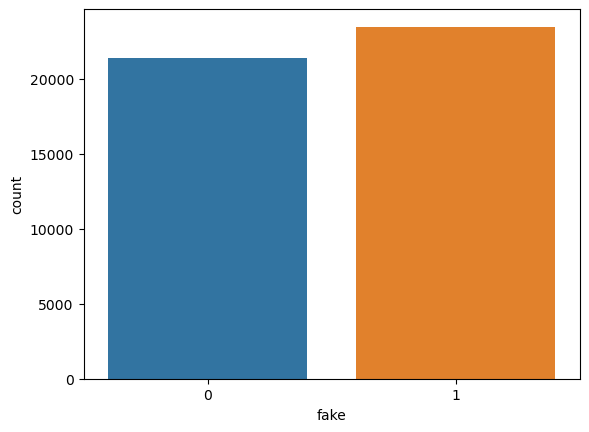

In [33]:
sns.countplot(x="fake", data=news)

In [34]:
news[news["fake"] == 1]["text"].head(5)

0    Donald Trump just couldn t wish all Americans ...
1    House Intelligence Committee Chairman Devin Nu...
2    On Friday, it was revealed that former Milwauk...
3    On Christmas day, Donald Trump announced that ...
4    Pope Francis used his annual Christmas Day mes...
Name: text, dtype: object

In [35]:
news[news["fake"] == 0]["text"].head(5)

0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
2    WASHINGTON (Reuters) - The special counsel inv...
3    WASHINGTON (Reuters) - Trump campaign adviser ...
4    SEATTLE/WASHINGTON (Reuters) - President Donal...
Name: text, dtype: object

<Axes: xlabel='subject', ylabel='count'>

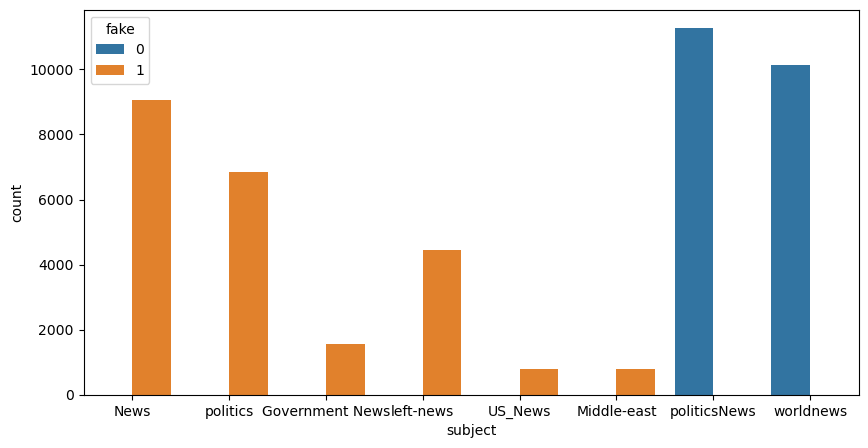

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x="subject", data=news, hue="fake")

### Инженерия признаков

In [37]:
news["date"] = pd.to_datetime(news["date"], errors="coerce")
news["Year"] = news["date"].dt.year
news["Month"] = news["date"].dt.month
news.head()

,title,text,subject,date,fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,2017.0,12.0


<Axes: xlabel='Year', ylabel='count'>

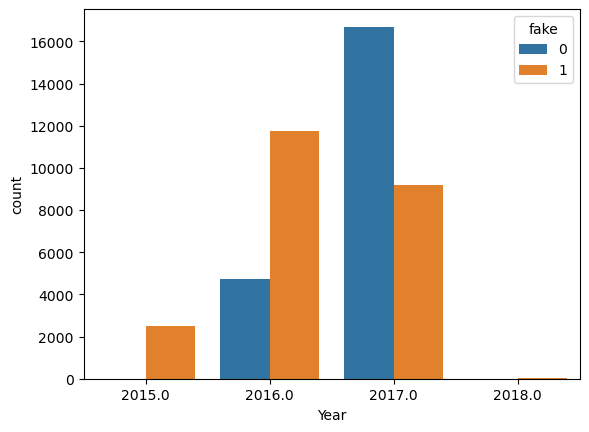

In [38]:
sns.countplot(x="Year", data=news, hue="fake")

<Axes: xlabel='Month', ylabel='count'>

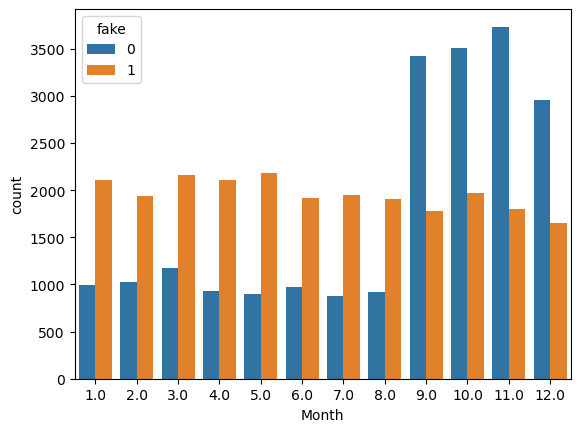

In [39]:
sns.countplot(x="Month", data=news, hue="fake")

In [40]:
news["text"] = news["title"] + news["text"]
news.drop(labels=("title"), axis=1, inplace=True)
news.head()

,text,subject,date,fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,News,2017-12-31,1,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,News,2017-12-31,1,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,News,2017-12-30,1,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,2017-12-29,1,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,News,2017-12-25,1,2017.0,12.0


### Финальная предобработка

In [41]:
news.drop(labels=["subject", "date", "Year", "Month"], axis=1, inplace=True)
news.head()

,text,fake
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


### Разбивка значений на train и test

In [42]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(news["text"].to_numpy(), news["fake"].to_numpy(), test_size = 0.2, random_state=42)

In [43]:
len(X_train), len(X_test), len(y_train), len(y_test)

(35918, 8980, 35918, 8980)

### Токенизация

In [44]:
round(sum([len(i.split()) for i in X_train])/ len(X_train))


417

In [45]:
max_vocab_length = 10000
max_length = 418
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorizer = TextVectorization(max_tokens=max_vocab_length, output_mode="int", output_sequence_length=max_length)
text_vectorizer.adapt(X_train)

In [46]:
sample_sentence = "Please Do Not Forget To Upvoted"
text_vectorizer([sample_sentence])


<tf.Tensor: shape=(1, 418), dtype=int64, numpy=
array([[1764,   91,   25, 2782,    3,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [47]:
import random
random_sentence = random.choice(X_train)
print(random_sentence, text_vectorizer(random_sentence))

 Why Conservatives Need To Stop Whining About Obama Being In Cuba During Brussels Attack (VIDEO)Terrorists attacked Brussels, Belgium in a tragedy that has left at least 30 people dead, and that means conservatives quickly attacked President Obama for being in Cuba at the time.On Twitter, conservatives did not waste any time using the act of terrorism to attack President Obama, who became the first American President to visit Cuba in 88 years since Calvin Coolidge did so in 1928.The historic trip is an effort to open the island nation to trade by normalizing relations enough to convince Congress to end the longtime embargo which remains one of the last remnants of the Cold War. It represents an opportunity to strengthen relations between our two nations and a chance to change Cuba from within via American tourism and business opportunities.Thus far, the trip has been successful as Cuba has welcomed President Obama with open arms. But once news broke of the terrorist attacks in Brussels

In [48]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim = max_vocab_length, output_dim=128, embeddings_initializer="uniform", input_length=max_length)
embedding

In [49]:
random_sentence = random.choice(X_train)
print(random_sentence, embedding(text_vectorizer(random_sentence)))

Tracking the U.S. economy under Trump in seven charts WASHINGTON (Reuters) - U.S. President Donald Trump has set many specific and general goals for his administration’s management of the economy, like raising growth to 3 percent and eliminating the country’s trade deficit.  The charts below show how key indicators performed during former President Barack Obama’s second term and how they are performing since Trump took office in January.   tf.Tensor(
[[-0.01969017 -0.00249346 -0.02767373 ... -0.01287097 -0.01953253
   0.02653401]
 [-0.02291315  0.02816143 -0.04211353 ...  0.04608215  0.0021836
  -0.02452688]
 [ 0.01817498 -0.0075947   0.03338191 ... -0.01070656  0.04573053
   0.01601018]
 ...
 [-0.02032328 -0.01609587  0.01946993 ... -0.00336308  0.0075439
   0.04371543]
 [-0.02032328 -0.01609587  0.01946993 ... -0.00336308  0.0075439
   0.04371543]
 [-0.02032328 -0.01609587  0.01946993 ... -0.00336308  0.0075439
   0.04371543]], shape=(418, 128), dtype=float32)


### Потсроение модели

In [57]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")

x = text_vectorizer(inputs)

x = embedding(x)

x = layers.LSTM(64)(x)

outputs =layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs, name="model_LSTM")

In [58]:
model.summary()

Model: "model_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 418)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 418, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [59]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])


In [60]:
model_history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1123/1123 [==============================] - 240s 213ms/step - loss: 0.4396 - accuracy: 0.7991 - val_loss: 0.2342 - val_accuracy: 0.9335
Epoch 2/5
1123/1123 [==============================] - 212s 189ms/step - loss: 0.2088 - accuracy: 0.9396 - val_loss: 0.1898 - val_accuracy: 0.9506
Epoch 3/5
1123/1123 [==============================] - 219s 195ms/step - loss: 0.4254 - accuracy: 0.7892 - val_loss: 0.5414 - val_accuracy: 0.6443
Epoch 4/5
1123/1123 [==============================] - 224s 199ms/step - loss: 0.1849 - accuracy: 0.9378 - val_loss: 0.0947 - val_accuracy: 0.9744
Epoch 5/5
1123/1123 [==============================] - 246s 219ms/step - loss: 0.0935 - accuracy: 0.9733 - val_loss: 0.0382 - val_accuracy: 0.9900


In [61]:
model_prediction = model.predict(X_test)
model_prediction[:10]

281/281 [==============================] - 17s 61ms/step


array([[0.9970811 ],
       [0.02077865],
       [0.00217548],
       [0.9962393 ],
       [0.00201535],
       [0.9953926 ],
       [0.9963466 ],
       [0.99388176],
       [0.0063086 ],
       [0.00447148]], dtype=float32)

In [62]:
model_preds = tf.squeeze(tf.round(model_prediction))
model_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 1., 0., 1., 1., 1., 0., 0.], dtype=float32)>

In [63]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print(accuracy_score(y_test, model_preds))
print(recall_score(y_test, model_preds))
print(precision_score(y_test, model_preds))
print(f1_score(y_test, model_preds))

0.9899777282850779
0.9877456158884429
0.9932016146165286
0.9904661016949152
